In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
airbnb = pd.read_csv(r'Singapore_Airbnb_listings.csv')

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [4]:
#drop columns "id", "host_id", "host_name" as they are not necessary in analysis
airbnb = airbnb.drop(["id", "host_id", "host_name"], axis=1)

In [5]:
airbnb.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,COZICOMFORT LONG TERM STAY ROOM 2,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,Pleasant Room along Bukit Timah,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,COZICOMFORT,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,Ensuite Room (Room 1 & 2) near EXPO,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,B&B Room 1 near Airport & EXPO,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [6]:
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 13 columns):
name                              7905 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 803.1+ KB


In [9]:
airbnb.isnull().sum()
#There are some missing values

name                                 2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [10]:
#Drop rows containing missing values
airbnb_index = airbnb["name"].dropna().index
airbnb = airbnb.iloc[airbnb_index,]

In [11]:
#change column "last_review" into datetime format
airbnb["last_review"] = pd.to_datetime(airbnb["last_review"])

In [12]:
#create a new column "year_of_review"
airbnb["year_of_review"] = airbnb["last_review"].dt.year

In [13]:
#create another new column "month_of_review"
airbnb["month_of_review"] = airbnb["last_review"].dt.month

In [14]:
airbnb.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year_of_review,month_of_review
0,COZICOMFORT LONG TERM STAY ROOM 2,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365,2013.0,10.0
1,Pleasant Room along Bukit Timah,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365,2014.0,12.0
2,COZICOMFORT,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365,2015.0,10.0
3,Ensuite Room (Room 1 & 2) near EXPO,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353,2019.0,8.0
4,B&B Room 1 near Airport & EXPO,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355,2019.0,7.0


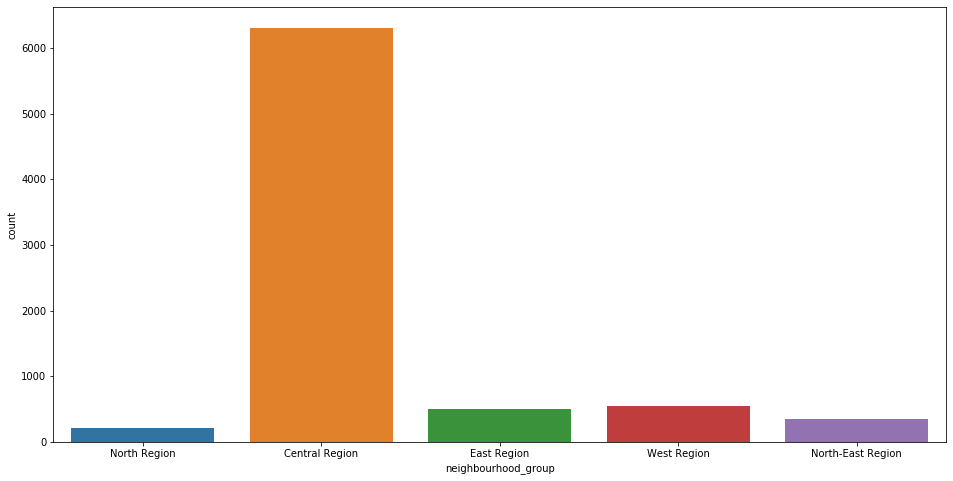

In [15]:
plt.figure(figsize=(16,8))
sns.countplot("neighbourhood_group", data=airbnb)
plt.show()
# it seems that central region has highest number of hotels and accomodations.
# most likely central region is the most famous spot for vacation.

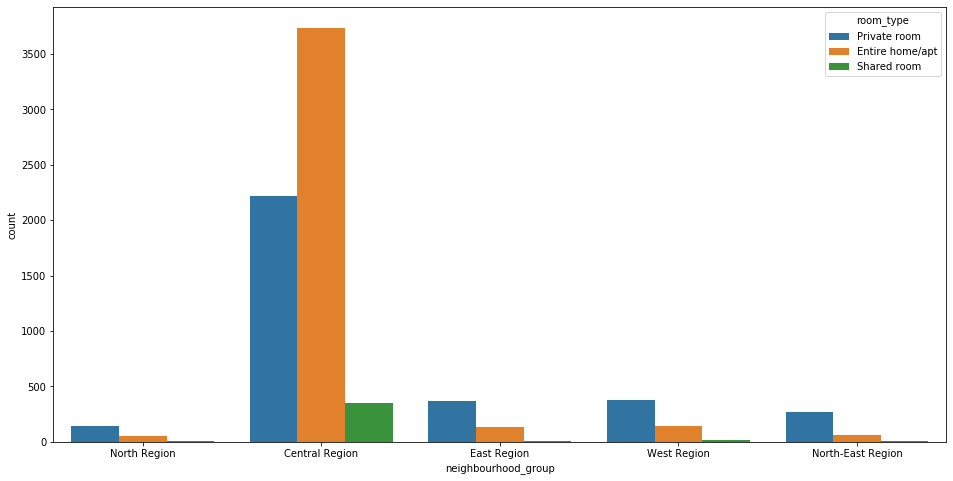

In [16]:
plt.figure(figsize=(16,8))
sns.countplot("neighbourhood_group", hue="room_type", data=airbnb)
plt.show()

# it seems that central region is also a famous vacation spot for family.
# as for regions other than central, they are preferred by solo traveller.

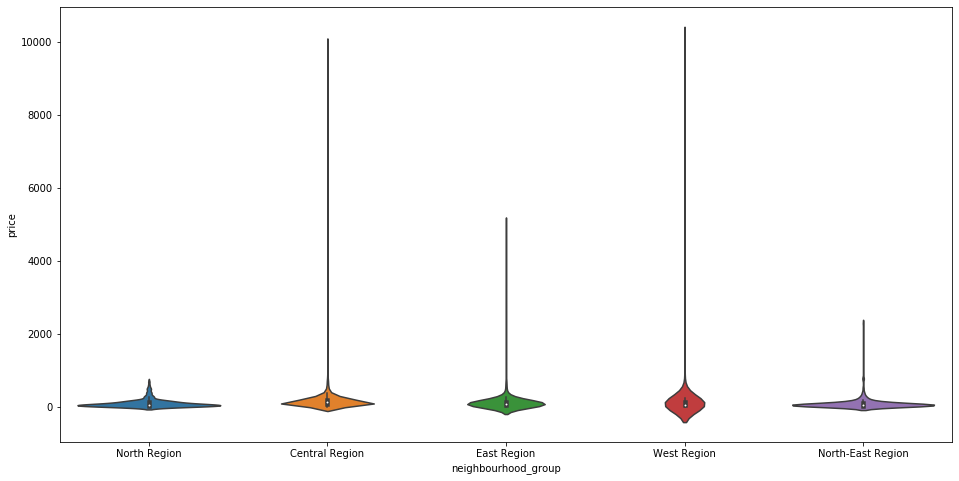

In [19]:
plt.figure(figsize=(16,8))
sns.violinplot(x="neighbourhood_group", y="price", data=airbnb)
plt.show()
# it seems there are some hotels or accomodations that are charging ridiculously high prices.

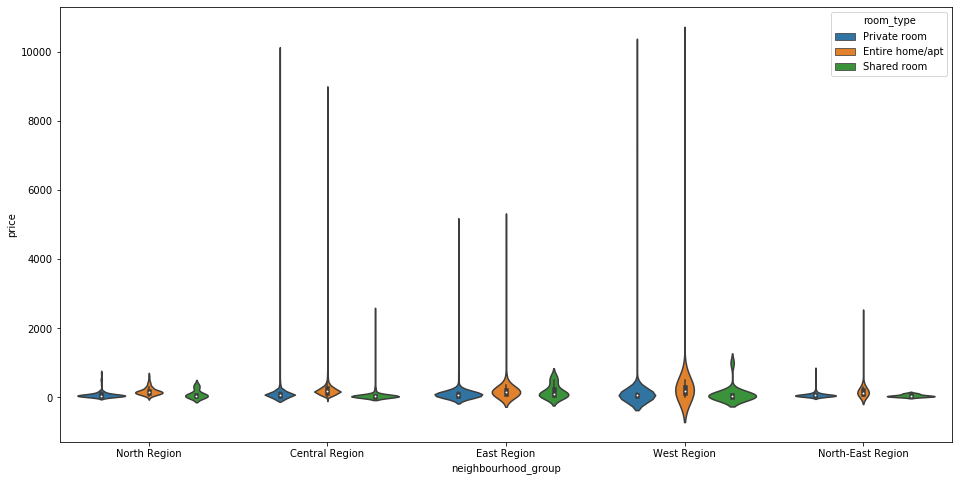

In [20]:
plt.figure(figsize=(16,8))
sns.violinplot(x="neighbourhood_group", hue="room_type", y="price", data=airbnb)
plt.show()
#west region is the one that charges highest prices for private room and entire hoom/apt despite there are low number of rooms available at that region

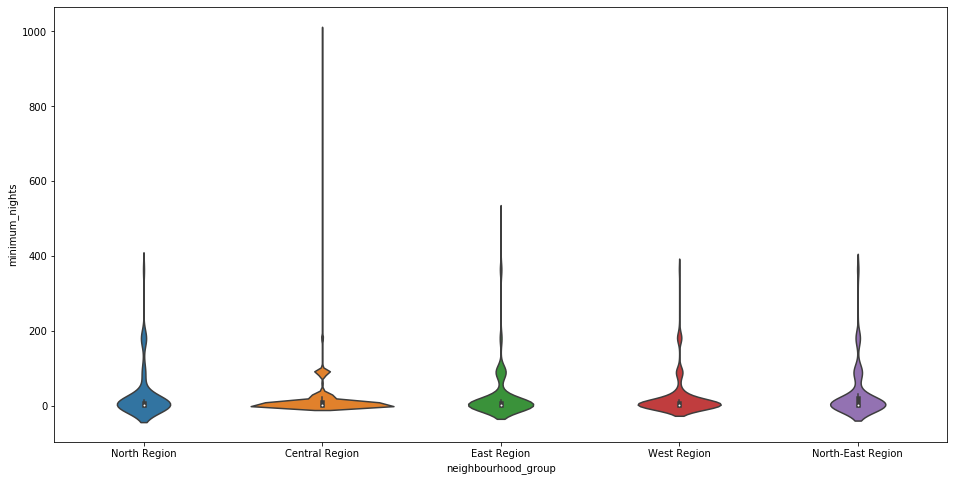

In [21]:
plt.figure(figsize=(16,8))
sns.violinplot(x="neighbourhood_group", y="minimum_nights", data=airbnb)
plt.show()
# central region has the highest minimum nights stayed.

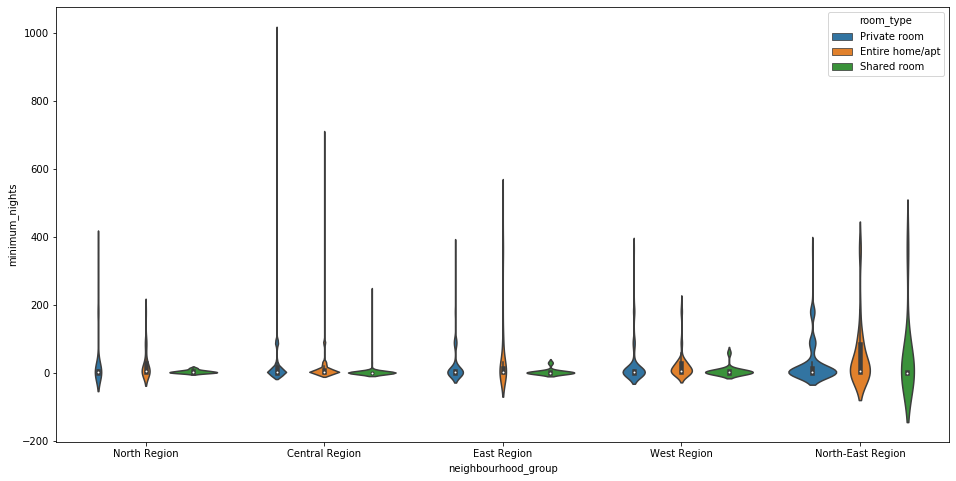

In [22]:
plt.figure(figsize=(16,8))
sns.violinplot(x="neighbourhood_group", y="minimum_nights", hue="room_type", data=airbnb)
plt.show()
# at central region, private room has the highest minimum nights 

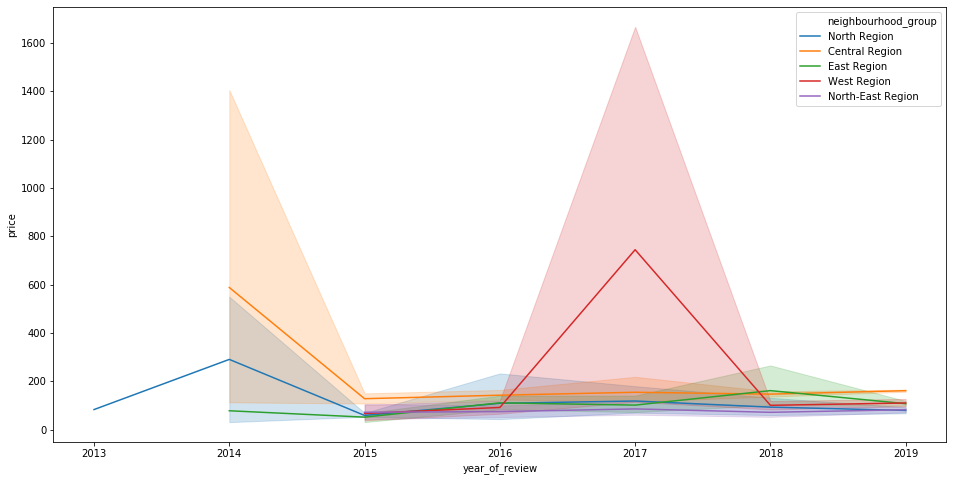

In [23]:
plt.figure(figsize=(16,8))
sns.lineplot(x="year_of_review", y="price",hue="neighbourhood_group", data=airbnb)
plt.show()

# it seems that at year 2017, hotels and accomodations at west regions have the highest price.
# it seems that hotels at most regions have higher price at year 2014.
# maybe year 2014 and 2017 are popular for vacation at Singapore.

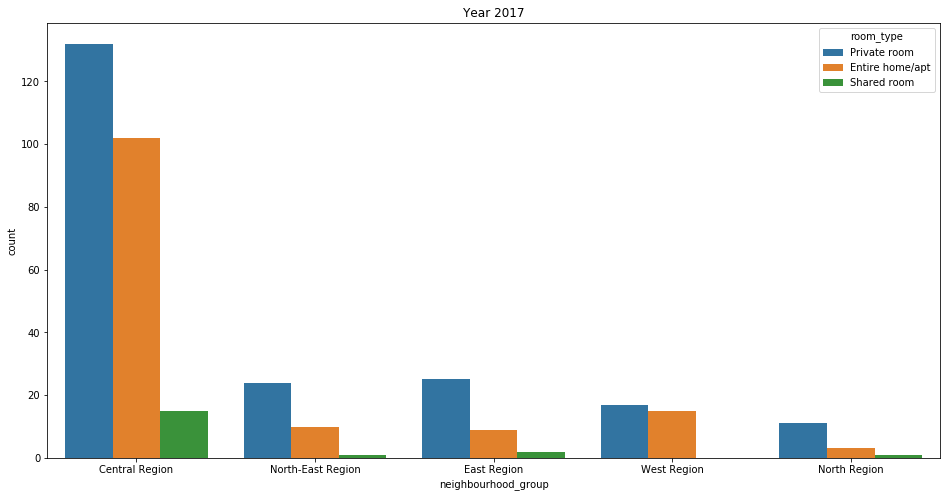

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(x="neighbourhood_group",hue="room_type", data=airbnb[airbnb["year_of_review"] == 2017.0]);plt.title("Year 2017")
plt.show()
# it seems that central region has the highest number of stays despite west region has the highest price

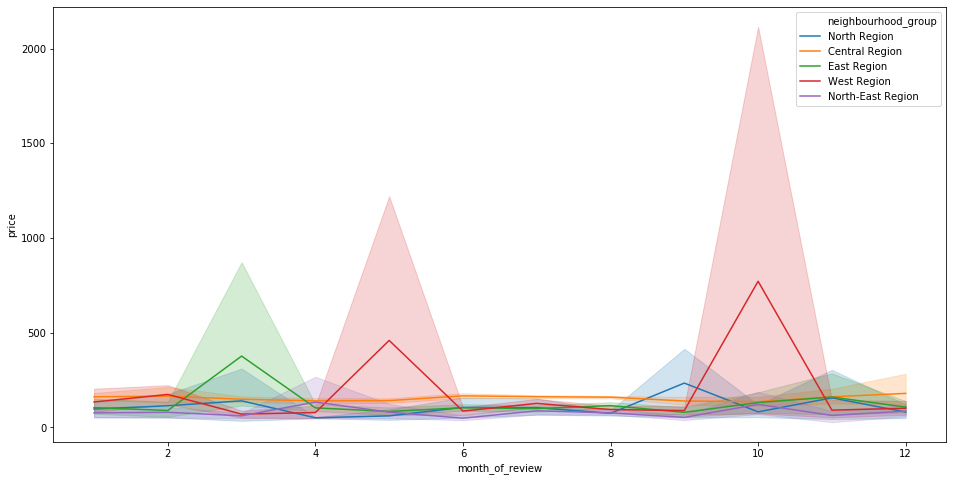

In [25]:
plt.figure(figsize=(16,8))
sns.lineplot(x="month_of_review", y="price",hue="neighbourhood_group", data=airbnb)
plt.show()
# it seems that hotels at West region charges the highest price at around October.
# perhaps October is the good month for vacation at Singapore.